## Not A Unit Test :D 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    
np.set_printoptions(precision=5)

In [10]:
lincar = envs.LinearCar()
executer = tools.Rollout(lincar, max_it=100, abort=False)

#policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))
#policy_grad = lambda x, a: np.array([1.,x[0],x[1]]) / a

policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.)
policy_grad = lambda x, a, par: np.array([1.,-x[0],-x[1]])*policy_par(par)(x)

policy = tools.Policy(policy_par,(3), gradient=policy_grad, sigma=0.2)
optimizer = srb.Reinforce(executer, lincar, max_it=1000, eps=0.001,  
                       parameter_domain=np.array([0,1]), rate = 0.5)

In [11]:
policy.setParameter(np.array([1,1,1]))
trace, i, _ = executer.rollout(policy)
t = trace[10]
print(policy.log_grad(t[1],t[0]))

[ 5.51753 -3.52532 -0.55057]


In [12]:
par, conv = optimizer.optimize(policy)

Start Reinforce optimization:
Initial Parameters: [ 0.44831  0.76137  0.3028 ]
Run: 0  	Parameter: 	[ 0.44831  0.76137  0.3028 ]	Reward: -43.6564118546
		Gradient: 	[  4.15141e-02   1.75666e-02   2.47038e-05]
Run: 10  	Parameter: 	[ 0.63706  0.7697   0.30094]	Reward: -61.3017781939
		Gradient: 	[-0.00989 -0.0052  -0.00046]
		Average Time: 	0.93s/step
Run: 20  	Parameter: 	[ 0.75502  0.71912  0.3034 ]	Reward: -72.3473724265
		Gradient: 	[-0.00536  0.00736 -0.0003 ]
		Average Time: 	1.00s/step
Run: 30  	Parameter: 	[ 0.70328  0.7466   0.30132]	Reward: -66.8791019889
		Gradient: 	[ 0.03524  0.00353  0.00185]
		Average Time: 	0.77s/step
Run: 40  	Parameter: 	[ 0.69704  0.76471  0.30137]	Reward: -59.8015534404
		Gradient: 	[  2.19029e-02  -6.57417e-03   1.27490e-05]
		Average Time: 	0.95s/step
Run: 50  	Parameter: 	[ 0.73124  0.76274  0.3015 ]	Reward: -63.3369765316
		Gradient: 	[-0.04098  0.01095  0.00131]
		Average Time: 	0.91s/step
Run: 60  	Parameter: 	[ 0.74961  0.74291  0.30209]	Rewar

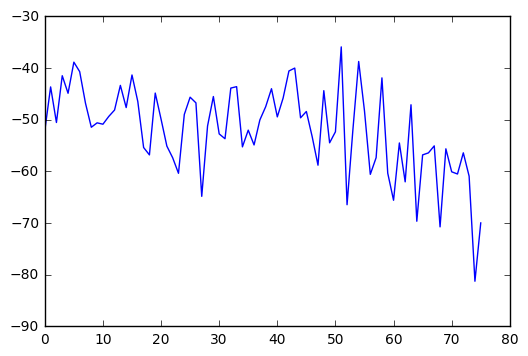

In [8]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter:	[ 0.72174  0.95236  0.63878]
Best Reward: 	-35.894102042


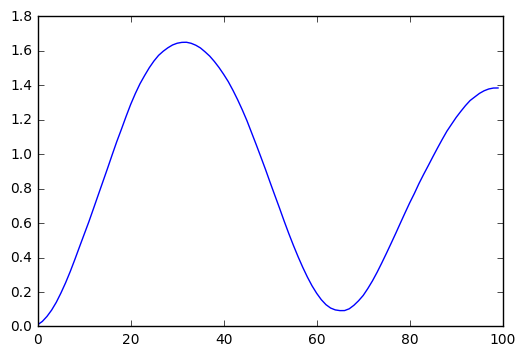

In [9]:
print("Best Parameter:\t"+str(optimizer.best_parameter))
print("Best Reward: \t"+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace, i, achieved = executer.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()

In [10]:
optimizer.parameters

[array([ 0.36703,  0.87473,  0.66056]),
 array([ 0.3705 ,  0.87479,  0.66051]),
 array([ 0.36939,  0.87536,  0.6605 ]),
 array([ 0.37201,  0.87434,  0.66053]),
 array([ 0.37319,  0.8746 ,  0.66057]),
 array([ 0.37439,  0.87486,  0.66054]),
 array([ 0.37576,  0.87403,  0.66052]),
 array([ 0.37451,  0.87396,  0.66053]),
 array([ 0.37816,  0.87353,  0.6605 ]),
 array([ 0.38144,  0.87318,  0.66049]),
 array([ 0.38368,  0.87396,  0.66051]),
 array([ 0.38252,  0.87461,  0.66056]),
 array([ 0.3845 ,  0.87551,  0.66059]),
 array([ 0.38808,  0.87425,  0.66058]),
 array([ 0.38861,  0.8757 ,  0.66065]),
 array([ 0.38675,  0.87788,  0.66069]),
 array([ 0.39127,  0.87725,  0.66066]),
 array([ 0.39793,  0.87629,  0.66058]),
 array([ 0.39915,  0.87539,  0.66059]),
 array([ 0.39809,  0.876  ,  0.6606 ]),
 array([ 0.39448,  0.87642,  0.66065]),
 array([ 0.39671,  0.87712,  0.66065]),
 array([ 0.39948,  0.87747,  0.66067]),
 array([ 0.40625,  0.8765 ,  0.66059]),
 array([ 0.40493,  0.87623,  0.66058]),
